# Random Forest Notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych


In [2]:

data = pd.read_csv("../dataset/wpbc_original_B.csv")
data_normalized = pd.read_csv("../dataset/wpbc_normalized_B.csv")
data_best_features = pd.read_csv("../dataset/wpbc_best_features_B.csv")
data

,OUTCOME,RADIUS_1,TEXTURE_1,PERIMETER_1,AREA_1,SMOOTHNESS_1,COMPACTNESS_1,CONCAVITY_1,CONCAVE_POINTS_1,SYMMETRY_1,...,PERIMETER_3,AREA_3,SMOOTHNESS_3,COMPACTNESS_3,CONCAVITY_3,CONCAVE_POINTS_3,SYMMETRY_3,FRACTAL_DIMENSIONS_3,TUMOR_SIZE,LYMPH_NODE_STATUS
0,0,18.020000,27.600000,117.500000,1013.000000,0.094890,0.103600,0.108600,0.070550,0.186500,...,139.700000,1436.000000,0.119500,0.192600,0.314000,0.117000,0.267700,0.081130,5.000000,5.000000
1,0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,...,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,3.000000,2.000000
2,0,21.370000,17.440000,137.500000,1373.000000,0.088360,0.118900,0.125500,0.081800,0.233300,...,159.100000,1949.000000,0.118800,0.344900,0.341400,0.203200,0.433400,0.090670,2.500000,0.000000
3,0,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,...,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,2.000000,0.000000
4,1,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,...,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,3.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1,20.026955,26.447778,135.085597,1257.432103,0.096783,0.184876,0.172653,0.109357,0.185664,...,171.289300,1882.995881,0.132166,0.485126,0.405787,0.191754,0.303419,0.091121,5.218107,9.917695
298,1,17.433955,21.816099,115.199748,959.636269,0.092011,0.127620,0.100975,0.075580,0.210960,...,138.999653,1321.191743,0.116899,0.275903,0.234718,0.152020,0.310379,0.075122,3.900032,1.199937
299,1,24.450253,18.960836,161.187481,1966.519188,0.090793,0.119089,0.180771,0.112794,0.160575,...,231.395676,3854.528911,0.117644,0.193159,0.308795,0.185801,0.237269,0.063876,3.070555,4.000000
300,1,19.635022,23.339172,128.800549,1192.500748,0.100584,0.116314,0.175905,0.100470,0.187260,...,148.704440,1480.529682,0.137292,0.265190,0.435569,0.186070,0.316944,0.070050,1.749875,10.001497


#Podział na cechy i zmienną docelową

In [3]:
X = data.drop("OUTCOME", axis=1)
y = data["OUTCOME"]
X_n = data_normalized.drop("OUTCOME", axis=1)
y_n = data_normalized["OUTCOME"]
X_b = data_best_features.drop("OUTCOME", axis=1)
y_b = data_best_features["OUTCOME"]

## Podział na zbiór treningowy i testowy

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.25, random_state=42)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.25, random_state=42)

## Random Forest dev

In [5]:
rf = RandomForestClassifier(random_state=42, max_depth=8, criterion='entropy')
rf_n = RandomForestClassifier(random_state=42, max_depth=8, criterion='entropy')
rf_b = RandomForestClassifier(random_state=42, max_depth=8, criterion='entropy')
rf.fit(X_train, y_train)
rf_n.fit(X_n_train, y_n_train)
rf_b.fit(X_b_train, y_b_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_n = rf_n.predict(X_n_test)
y_pred_rf_b = rf_b.predict(X_b_test)
print("\nRandom Forest:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Confusion Matrix:
 [[27  7]
 [ 8 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        34
           1       0.83      0.81      0.82        42

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
grid = {
    'max_depth': np.arange(1,10,1),
    'criterion': ['gini','entropy']
}
search = GridSearchCV(
    estimator=rf,
    param_grid=grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)
results = search.fit(X=X_train, y=y_train)
results.best_params_

{'criterion': 'gini', 'max_depth': np.int64(5)}

## Wizualizacja wyników

In [8]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

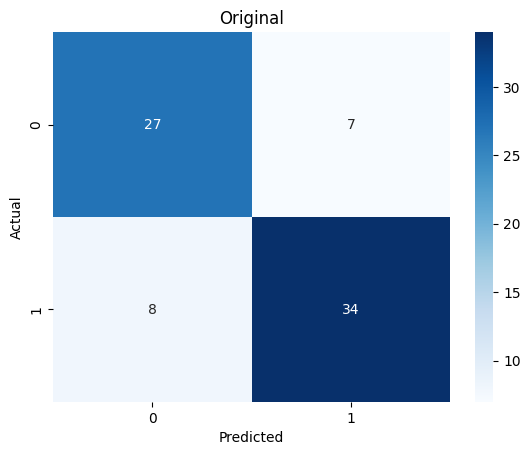

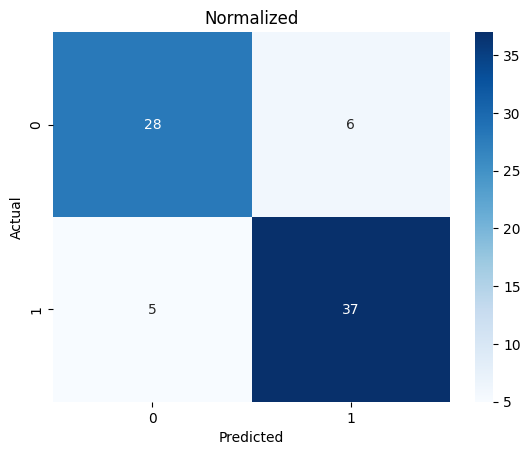

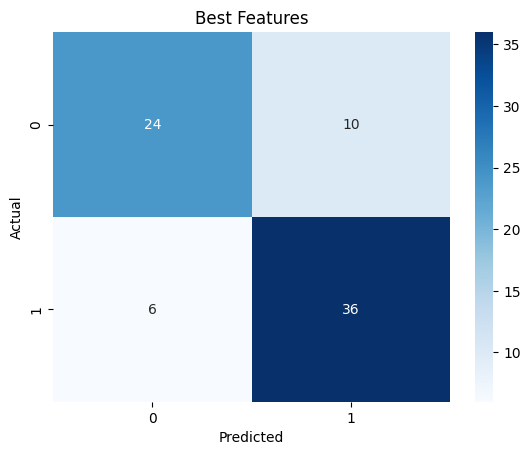

In [9]:

plot_confusion_matrix(y_test, y_pred_rf, "Original")

plot_confusion_matrix(y_n_test, y_pred_rf_n, "Normalized")

plot_confusion_matrix(y_b_test, y_pred_rf_b, "Best Features")

